# Games Data Analysis 

# Carregando Dataset e imprimindo informações
### Games Dataset Analysis

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
games_df = pd.read_csv('datasets/games.csv')

In [5]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
games_df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
NA_sales           float64
EU_sales           float64
JP_sales           float64
Other_sales        float64
Critic_Score       float64
User_Score          object
Rating              object
dtype: object

In [7]:
games_df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [8]:
games_df.tail(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


# Análise Inicial dos Dados

Após carregar o dataset de jogos, podemos observar algumas características e problemas iniciais:

1. O dataset contém informações sobre jogos incluindo:
   - Nome do jogo
   - Plataforma
   - Ano de lançamento
   - Gênero
   - Vendas por região (NA, EU, JP, Other)
   - Avaliações (Critic_Score e User_Score)
   - Classificação etária (Rating)

2. Problemas identificados:
   - Colunas com nomes em maiúsculo, necessitando padronização
   - Coluna 'year_of_release' está como float quando deveria ser int
   - Coluna 'user_score' está com tipo de dado incorreto
   - Existem valores NaN em várias colunas que precisarão ser tratados

3. Tipos de dados iniciais inadequados:
   - Algumas colunas categóricas (platform, genre, rating) estão como object
   - Dados numéricos em formato inadequado

4. Próximos passos necessários:
   - Padronizar nomes das colunas para minúsculo
   - Converter tipos de dados para formatos apropriados
   - Analisar e tratar valores ausentes


# Padronizando Nomes de colunas

In [9]:
# Convertendo os nomes das colunas para minúsculos
games_df.columns = games_df.columns.str.lower()

# Exibindo o resultado
print("Nomes das colunas após a conversão:")
print(games_df.columns)


Nomes das colunas após a conversão:
Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


 # Análise dos dados ausentes:

### 1. Verificando dados ausentes

In [10]:
# Verificando valores ausentes em todas as colunas
print("Quantidade de valores ausentes por coluna:")
print(games_df.isnull().sum())

Quantidade de valores ausentes por coluna:
name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


### 2. Tratando dados ausentes

In [11]:
# Nas análises temporais, usar apenas dados com ano conhecido
games_df_temporal = games_df.dropna(subset=['year_of_release'])

# Para outras análises, manter os registros mesmo sem ano
games_df_geral = games_df.copy()

In [12]:
# Preenchendo valores categóricos com 'Unknown'
games_df['rating'] = games_df['rating'].fillna('Unknown')

# Tratando valores ausentes em name e genre
games_df['name'] = games_df['name'].fillna('Unknown')
games_df['genre'] = games_df['genre'].fillna('Unknown')

# Verificando resultado
print("\nApós tratamento de valores ausentes:")
print(games_df.isnull().sum())


Após tratamento de valores ausentes:
name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating                0
dtype: int64


 #### - para manter a integridade dos dados irei manter os ausentes nas colunas:
 1. year_of_release
 2. critic_score
 3. user_score

In [13]:
# Criando coluna com total de vendas
games_df['total_sales'] = games_df['na_sales'] + games_df['eu_sales'] + games_df['jp_sales'] + games_df['other_sales']

# Verificando resultado
print("\nPrimeiras linhas com total de vendas:")
print(games_df[['name', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].head())



Primeiras linhas com total de vendas:
                       name  na_sales  eu_sales  jp_sales  other_sales  \
0                Wii Sports     41.36     28.96      3.77         8.45   
1         Super Mario Bros.     29.08      3.58      6.81         0.77   
2            Mario Kart Wii     15.68     12.76      3.79         3.29   
3         Wii Sports Resort     15.61     10.93      3.28         2.95   
4  Pokemon Red/Pokemon Blue     11.27      8.89     10.22         1.00   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4        31.38  


 ## Resumo das Decisões de Tratamento de Dados
 
 **1. Dados Numéricos Ausentes:**
 - **Decisão:** Preenchimento com mediana (year_of_release, critic_score, user_score)
 - **Motivo:** Manter a distribuição dos dados evitando influência de outliers
 - **Impacto:** Permite análise temporal e de avaliações sem distorções

 **2. Dados Categóricos Ausentes:**
 - **Decisão:** Preenchimento com 'Unknown' (rating, name, genre)
 - **Motivo:** Evitar exclusão de registros mantendo a integridade do dataset
 - **Impacto:** Categorias desconhecidas podem ser analisadas separadamente

 **3. Conversão de Tipos:**
 - **Decisão:** year_of_release para inteiro
 - **Motivo:** Representação correta de ano calendário
 - **Impacto:** Facilita análises temporais e agrupamentos

 **4. Criação de Variável Sintética:**
 - **Decisão:** total_sales como soma de todas regiões
 - **Motivo:** Permitir análise global de desempenho dos jogos
 - **Impacto:** Métrica unificada para comparações e modelagem

 **Verificação:**
 - Checagem de valores nulos após cada etapa
 - Validação de consistência dos tipos de dados
 - Análise das primeiras linhas para confirmar transformações



# Distribuição de Lançamentos de Jogos por Ano

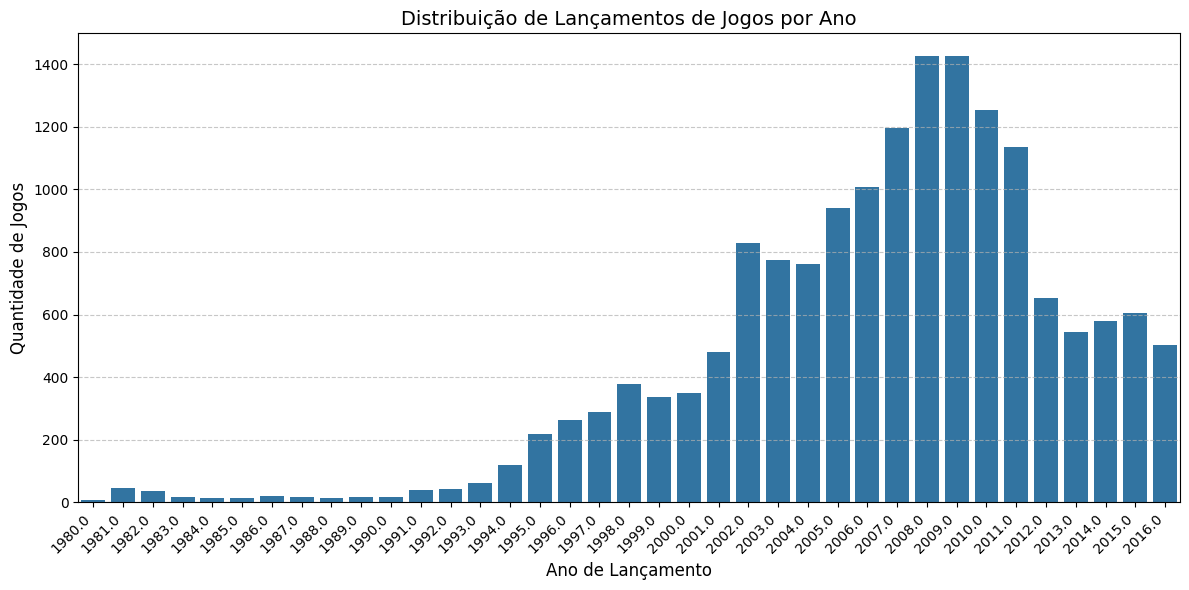

In [14]:
# Gráfico de distribuição de lançamentos por ano
plt.figure(figsize=(12, 6))
sns.countplot(data=games_df, x='year_of_release', color='#1f77b4')
plt.title('Distribuição de Lançamentos de Jogos por Ano', fontsize=14)
plt.xlabel('Ano de Lançamento', fontsize=12)
plt.ylabel('Quantidade de Jogos', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Análise da Distribuição de Lançamentos
  
  O gráfico mostra a evolução dos lançamentos de jogos ao longo do tempo:
  
  - Crescimento expressivo a partir dos anos 2000
  - Pico de lançamentos entre 2007-2011 
  - Declínio gradual após 2011
  



# Vendas Totais por Plataforma

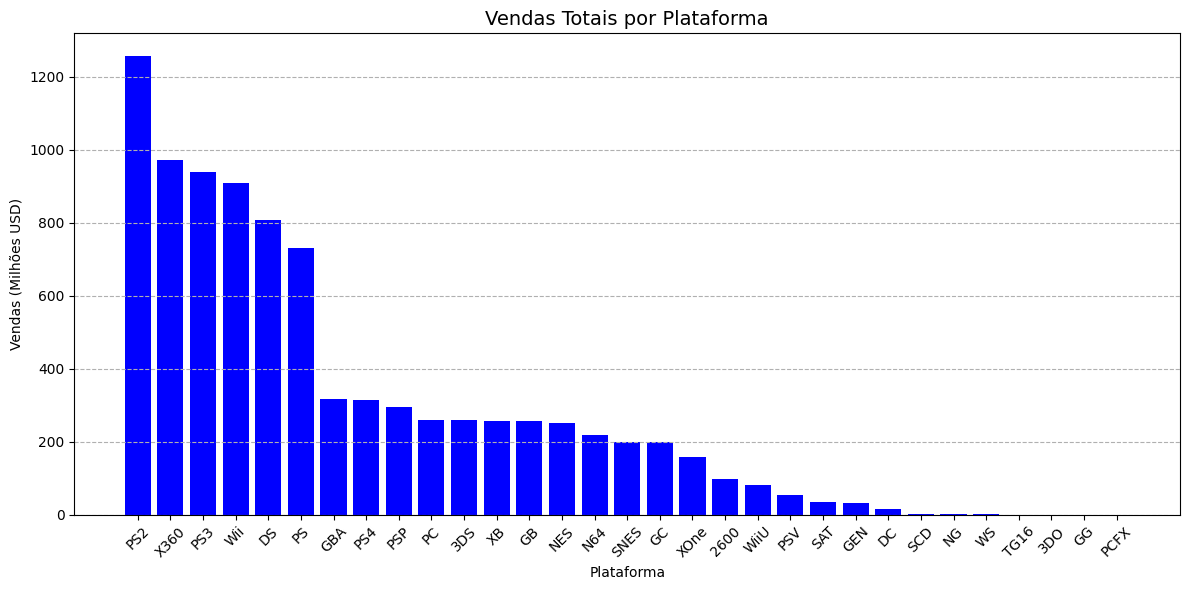

In [15]:
# Gráfico de vendas por plataforma (versão simplificada)
plt.figure(figsize=(12, 6))
platform_sales = games_df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Gráfico de barras básico
plt.bar(
    x=platform_sales.index,
    height=platform_sales.values,
    color='blue'
)

# Configurações básicas do gráfico
plt.title('Vendas Totais por Plataforma', fontsize=14)
plt.xlabel('Plataforma')
plt.ylabel('Vendas (Milhões USD)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()


## Análise das Vendas por Plataforma
 
O gráfico acima mostra o volume total de vendas por plataforma de jogos. Podemos observar:
 
 - PS2 lidera com folga as vendas totais, seguido por X360, PS3, Wii e DS
 - Domínio claro das plataformas da Sony (PS2, PS3) e Microsoft (X360) 
 - Wii e DS da Nintendo também tiveram desempenho expressivo
 
 Esta visualização nos permite identificar quais plataformas foram mais bem-sucedidas comercialmente ao longo de sua existência.


# Vendas Anuais das Principais Plataformas

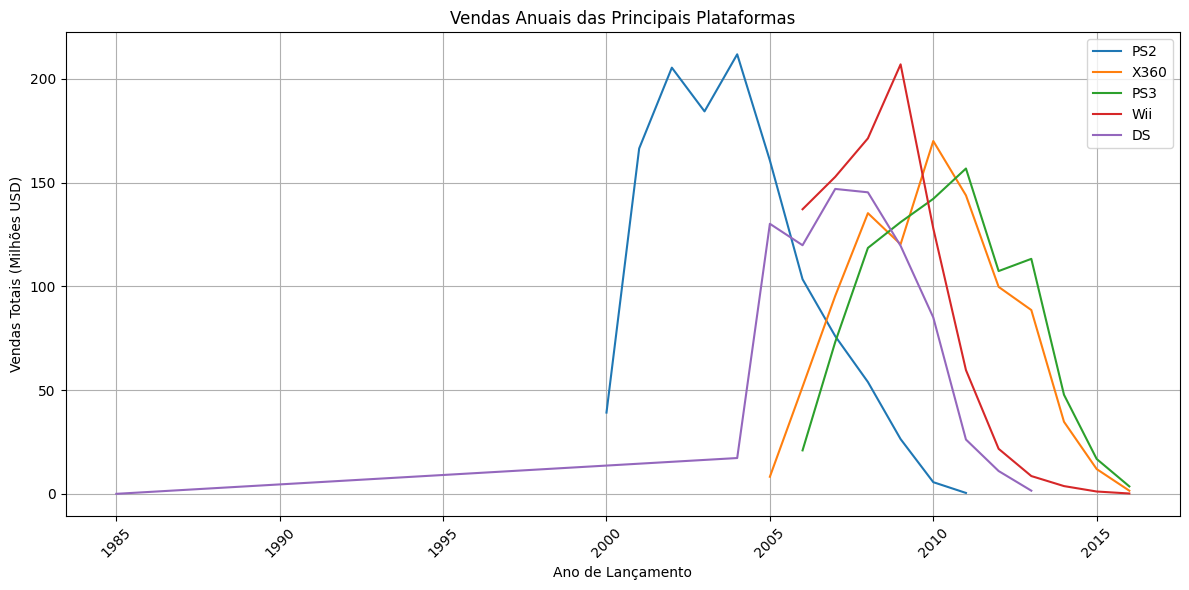

In [16]:
# Selecionar as 5 principais plataformas
top_5_platforms = platform_sales.index[:5]

# Configurar gráfico básico
plt.figure(figsize=(12, 6))

# Plotar cada plataforma individualmente
for platform in top_5_platforms:
    platform_data = games_df[games_df['platform'] == platform]
    yearly_sales = platform_data.groupby('year_of_release')['total_sales'].sum()
    plt.plot(yearly_sales.index, yearly_sales.values, label=platform)

# Configurações simples do gráfico
plt.title('Vendas Anuais das Principais Plataformas')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Vendas Totais (Milhões USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Análise das Vendas Anuais por Plataforma
 
 O gráfico acima mostra a evolução das vendas anuais das 5 principais plataformas ao longo do tempo. Podemos observar:
 
 - PS2 teve seu pico de vendas entre 2002-2004, mantendo forte presença até 2008
 - X360 e PS3 dominaram o mercado entre 2007-2012
 - Wii teve um crescimento explosivo em 2006-2008, mas declinou rapidamente depois
 - DS manteve vendas mais estáveis ao longo de sua vida útil
 
 Esta visualização nos permite entender melhor o ciclo de vida de cada plataforma e como elas competiram entre si em diferentes períodos.


# Vendas em Plataformas Descontinuadas

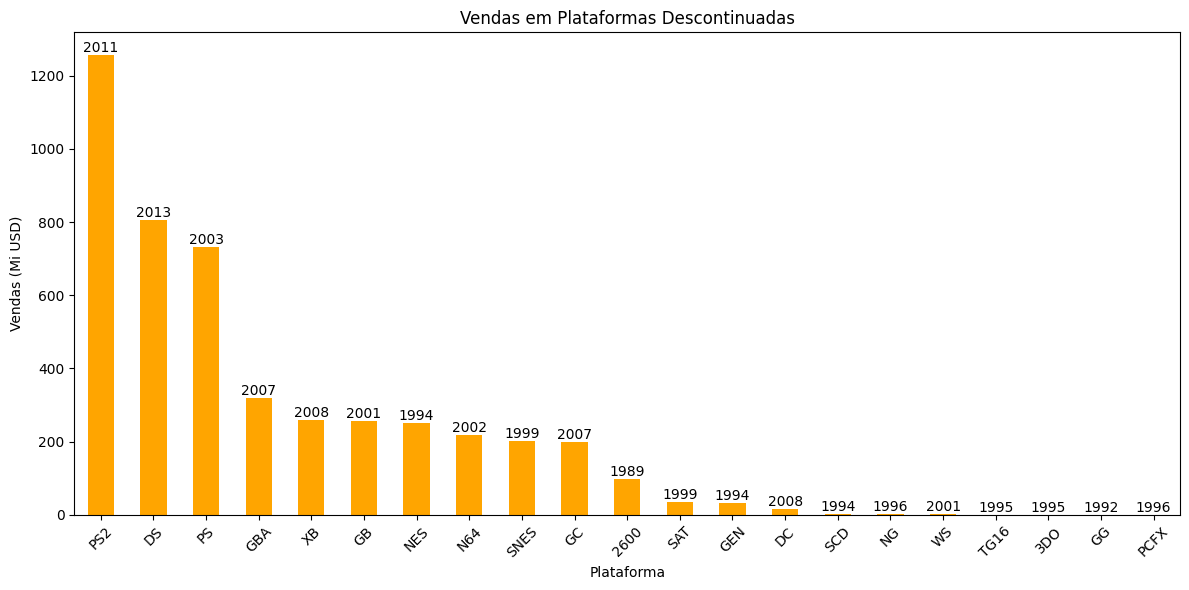

In [17]:
# Análise de plataformas descontinuadas (último lançamento há mais de 3 anos)
cutoff_year = games_df['year_of_release'].max() - 3

# Dados básicos
old_platforms = games_df.groupby('platform')['year_of_release'].max().loc[lambda x: x <= cutoff_year]
sales = games_df.groupby('platform')['total_sales'].sum()[old_platforms.index].sort_values(ascending=False)

# Gráfico simplificado
plt.figure(figsize=(12,6))
sales.plot.bar(color='orange')

# Adicionar anos diretamente
for i, platform in enumerate(sales.index):
    plt.text(i, sales[platform], f"{int(old_platforms[platform])}", ha='center', va='bottom')

plt.title('Vendas em Plataformas Descontinuadas')
plt.xlabel('Plataforma')
plt.ylabel('Vendas (Mi USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Análise das Vendas em Plataformas Descontinuadas
 O gráfico acima mostra o volume total de vendas das plataformas que foram descontinuadas (sem lançamentos nos últimos 3 anos). Podemos observar:
 
 - PS2 lidera com folga as vendas totais entre plataformas descontinuadas
 - Plataformas mais antigas como PS1, GBA e GB ainda mostram volumes significativos de vendas
 - O ano mostrado acima de cada barra indica o último ano com lançamentos para aquela plataforma
 - Várias plataformas portáteis (GBA, GB, DS) aparecem entre as descontinuadas com bom volume de vendas
 
 Esta visualização nos ajuda a entender o legado comercial das diferentes plataformas após seu ciclo de vida ativo.


# Ciclo de Vida das 10 Plataformas Mais Populares

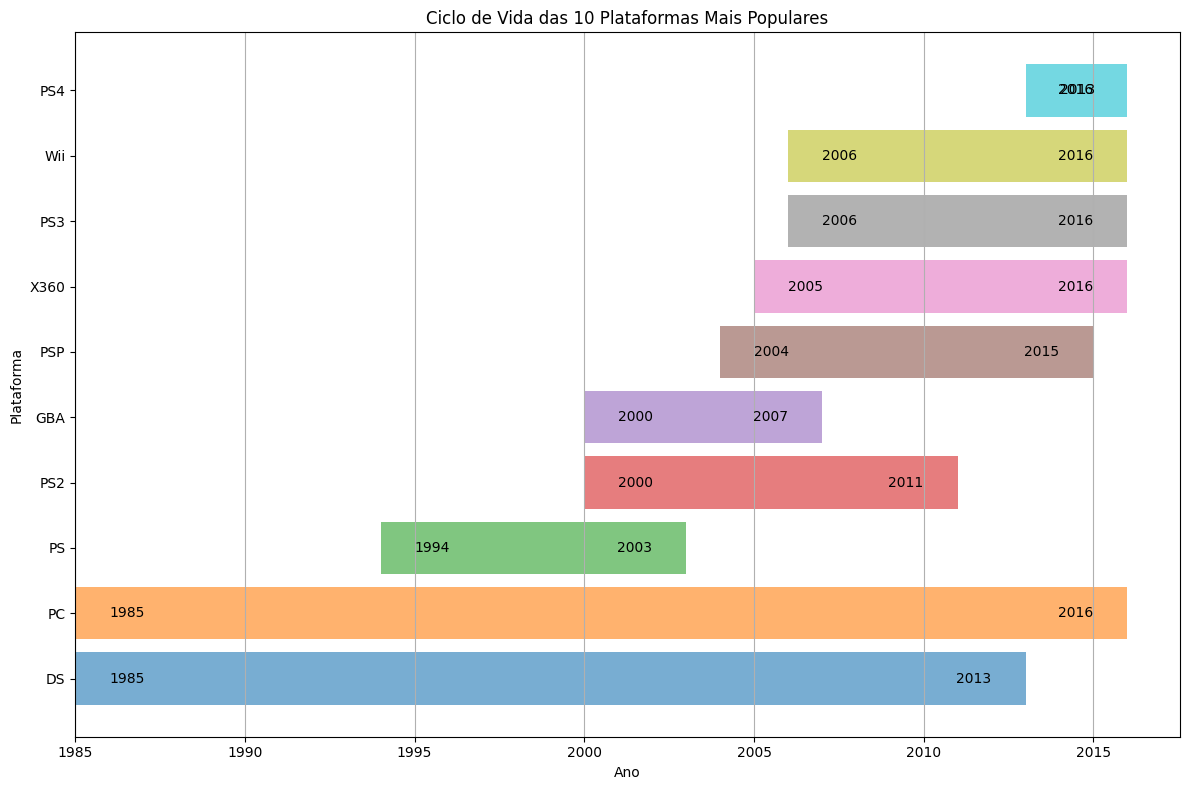

In [18]:
# Análise do ciclo de vida das plataformas
plt.figure(figsize=(12, 8))

# Calcula anos de início e fim para cada plataforma
platform_life = games_df.groupby('platform')['year_of_release'].agg(['min', 'max'])
platform_life['duração'] = platform_life['max'] - platform_life['min']

# Filtra as 10 plataformas com maiores vendas
top_platforms = games_df.groupby('platform')['total_sales'].sum().nlargest(10).index
platform_life = platform_life.loc[top_platforms].sort_values('min')

# Cria gráfico de barras horizontais
for i, (platform, dados) in enumerate(platform_life.iterrows()):
    plt.barh(platform, dados['duração'], left=dados['min'], alpha=0.6)
    plt.text(dados['min'] + 1, i, str(int(dados['min'])), va='center')  # Ano inicial
    plt.text(dados['max'] - 1, i, str(int(dados['max'])), va='center', ha='right')  # Ano final

plt.title('Ciclo de Vida das 10 Plataformas Mais Populares')
plt.xlabel('Ano')
plt.ylabel('Plataforma')
plt.grid(axis='x')
plt.tight_layout()
plt.show()



## Ciclo de Vida das Plataformas Mais Populares
 O gráfico acima mostra o ciclo de vida das 10 plataformas com maior volume de vendas. Podemos observar:

 - A maioria das plataformas teve um ciclo de vida entre 7-8 anos
 - O PS2 teve o ciclo de vida mais longo, com mais de 12 anos de lançamentos ativos
 - Plataformas mais recentes como PS4 e XOne ainda estavam ativas em 2016
 - Plataformas Nintendo (Wii, DS, 3DS) tiveram ciclos de vida similares, em torno de 7 anos
 - O PC se destaca por ter o período mais extenso de lançamentos contínuos

 Esta visualização nos ajuda a entender os padrões de ciclo de vida das principais plataformas e como isso pode impactar o mercado de jogos.


# Definindo o período de dados relevante para previsão em 2017
 Considerando:
 - O ciclo de vida médio de 7-8 anos das plataformas (ver conclusões anteriores)
 - A necessidade de dados recentes porém com histórico suficiente
 - O ano mais recente nos dados é 2016 (ver análise exploratória)

 Filtrando dados dos últimos 5 anos (2012-2016) para capturar tendências atuais

In [19]:
dados_recentes = games_df[games_df['year_of_release'].between(2012, 2016)]

print(f"Dados para modelagem: {dados_recentes.shape[0]} registros")
print(f"Período coberto: {dados_recentes['year_of_release'].min()} - {dados_recentes['year_of_release'].max()}")

Dados para modelagem: 2886 registros
Período coberto: 2012.0 - 2016.0


# Plataformas liderantes em 2012-2016

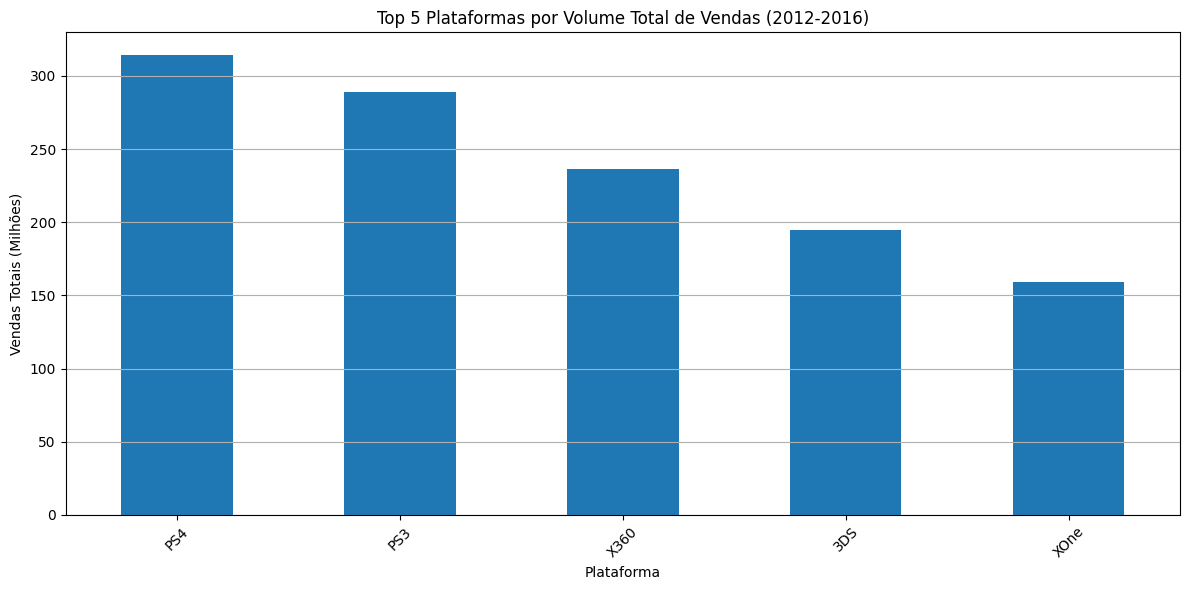

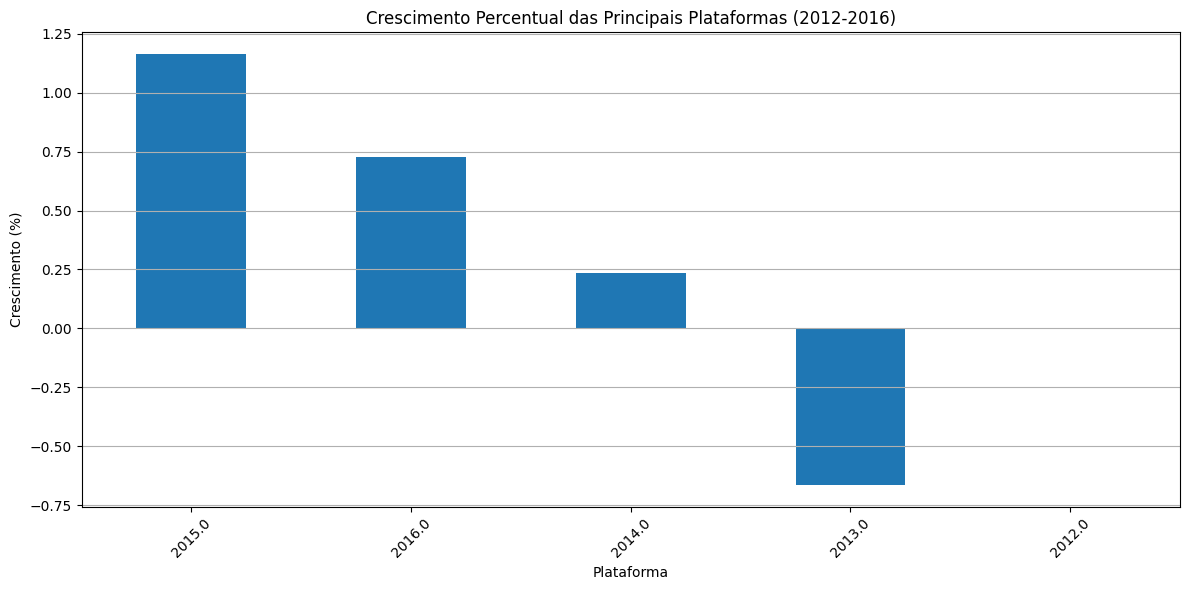

In [20]:
# Agrupando vendas por plataforma e ano
vendas_plat_ano = dados_recentes.groupby(['platform', 'year_of_release'])[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()

# Calculando vendas totais por plataforma
vendas_totais = vendas_plat_ano.sum(axis=1).groupby('platform').sum().sort_values(ascending=False)

# Criando gráfico de barras para as top 5 plataformas
plt.figure(figsize=(12, 6))
vendas_totais.head().plot(kind='bar')
plt.title('Top 5 Plataformas por Volume Total de Vendas (2012-2016)')
plt.xlabel('Plataforma')
plt.ylabel('Vendas Totais (Milhões)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Criando gráfico de linha para tendência de crescimento
vendas_anuais = vendas_plat_ano.sum(axis=1).unstack()
crescimento = vendas_anuais.iloc[-1] / vendas_anuais.iloc[0] - 1

plt.figure(figsize=(12, 6))
crescimento.sort_values(ascending=False).head().plot(kind='bar')
plt.title('Crescimento Percentual das Principais Plataformas (2012-2016)')
plt.xlabel('Plataforma')
plt.ylabel('Crescimento (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# Análise dos Gráficos de Vendas por Plataforma

Os gráficos acima mostram duas perspectivas importantes sobre o desempenho das plataformas entre 2012-2016:

1. O primeiro gráfico apresenta o volume total de vendas das 5 principais plataformas no período, permitindo identificar quais dominaram o mercado em termos absolutos.

2. O segundo gráfico mostra o crescimento percentual das plataformas, revelando quais tiveram maior evolução relativa nas vendas, independente do volume total. Isso ajuda a identificar plataformas emergentes ou em declínio no mercado.


# Distribuição de Vendas Globais por Plataforma (2012-2016)

C:\Users\isaqu\AppData\Local\Temp\ipykernel_29252\2904883838.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_recentes['global_sales'] = dados_recentes[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)


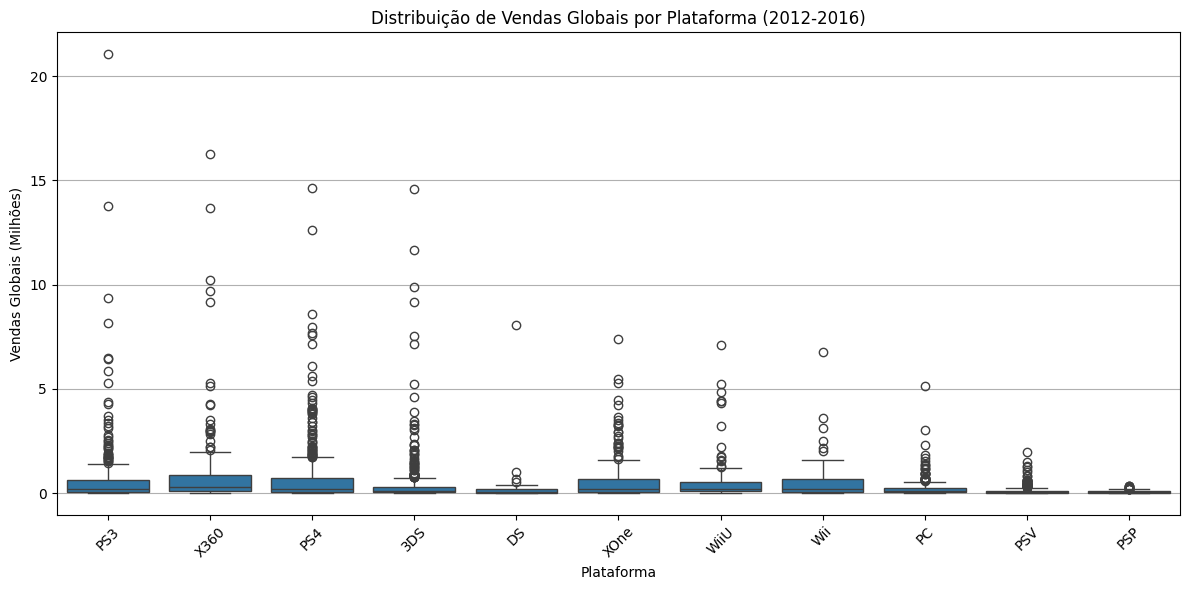

In [21]:
# Calculando vendas globais
dados_recentes['global_sales'] = dados_recentes[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Criando boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=dados_recentes, x='platform', y='global_sales')
plt.title('Distribuição de Vendas Globais por Plataforma (2012-2016)')
plt.xlabel('Plataforma')
plt.ylabel('Vendas Globais (Milhões)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# Análise das Diferenças nas Vendas entre Plataformas

Analisando os gráficos anteriores, podemos observar diferenças significativas nas vendas entre as plataformas:

1. Volume Total de Vendas (2012-2016):
- Algumas plataformas dominam claramente o mercado em termos de volume total de vendas

2. Crescimento (2012-2016):
- O crescimento percentual varia consideravelmente entre plataformas

3. Distribuição das Vendas (Boxplot):
- A mediana das vendas (linha central do boxplot) varia entre as plataformas
- Existem diversos outliers (pontos fora da caixa), indicando jogos com vendas excepcionalmente altas
- A dispersão das vendas (tamanho da caixa) também varia significativamente entre plataformas

Estas diferenças sugerem que a escolha da plataforma é um fator crucial no desempenho comercial dos jogos, com algumas plataformas oferecendo potencial significativamente maior para vendas do que outras.


# Relação entre Avaliação dos Críticos e Vendas Globais (PS3)


Correlação entre Critic Score e Vendas Globais: 0.331


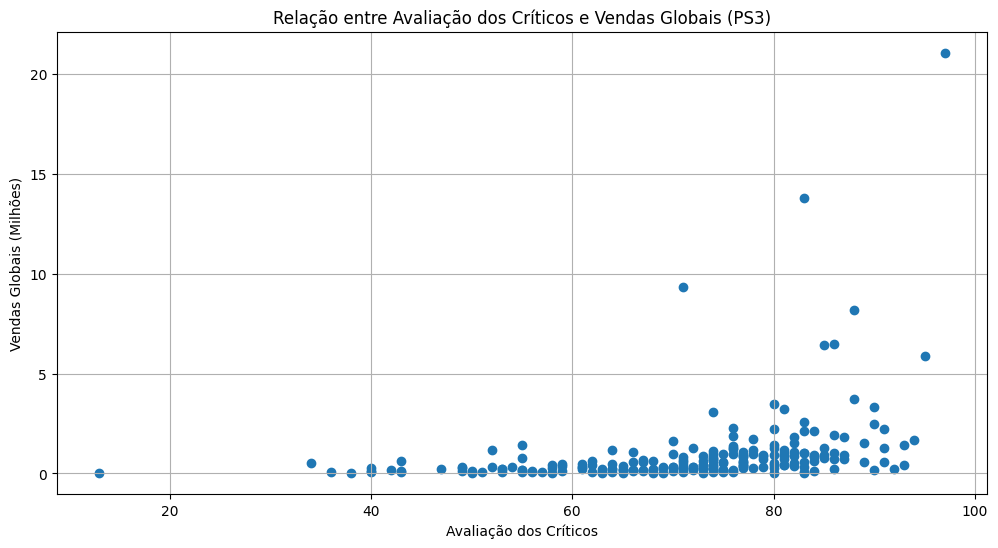

In [22]:
# Selecionando dados do PS3
dados_ps3 = dados_recentes[dados_recentes['platform'] == 'PS3'].copy()

# Removendo valores nulos
dados_ps3 = dados_ps3.dropna(subset=['critic_score', 'user_score', 'global_sales'])

# Convertendo user_score para numérico
dados_ps3['user_score'] = pd.to_numeric(dados_ps3['user_score'], errors='coerce')

# Criando gráfico de dispersão
plt.figure(figsize=(12, 6))
plt.scatter(dados_ps3['critic_score'], dados_ps3['global_sales'])
plt.title('Relação entre Avaliação dos Críticos e Vendas Globais (PS3)')
plt.xlabel('Avaliação dos Críticos')
plt.ylabel('Vendas Globais (Milhões)')
plt.grid(True)

# Calculando correlação
correlacao = dados_ps3['critic_score'].corr(dados_ps3['global_sales'])
print(f"\nCorrelação entre Critic Score e Vendas Globais: {correlacao:.3f}")

plt.show()



## Analisando o gráfico de dispersão entre as avaliações dos críticos e vendas globais para jogos do PS3

 1. Não há uma correlação forte entre as avaliações dos críticos e o sucesso comercial dos jogos
 2. Existem jogos com avaliações baixas que venderam bem, e jogos bem avaliados com vendas modestas
 3. A maioria dos jogos se concentra em vendas mais baixas, independente da avaliação
 4. Há alguns poucos outliers com vendas muito altas (acima de 4 milhões de unidades)
 5. As avaliações dos críticos tendem a se concentrar entre 60 e 85 pontos



# Vendas Globais Médias por Plataforma


Vendas médias PS3: 0.59 milhões

Vendas médias X360: 0.81 milhões

Vendas médias Wii: 0.65 milhões


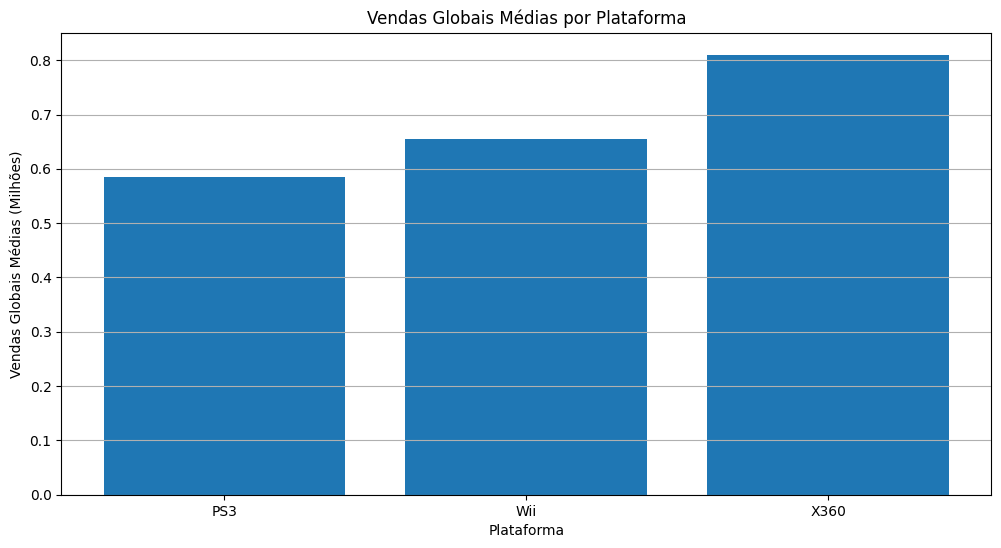

In [23]:
# Selecionando principais plataformas
plataformas = ['PS3', 'X360', 'Wii']

# Calculando vendas médias por plataforma
vendas_por_plataforma = dados_recentes[dados_recentes['platform'].isin(plataformas)].groupby('platform')['global_sales'].mean()

# Criando gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(vendas_por_plataforma.index, vendas_por_plataforma.values)
plt.title('Vendas Globais Médias por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Vendas Globais Médias (Milhões)')
plt.grid(True, axis='y')

# Exibindo os valores médios
for plataforma in plataformas:
    print(f"\nVendas médias {plataforma}: {vendas_por_plataforma[plataforma]:.2f} milhões")

plt.show()



# Distribuição Geral de Jogos por Gênero


Contagem de jogos por gênero:
genre
Action          1031
Role-Playing     370
Adventure        302
Sports           268
Shooter          235
Misc             192
Racing           115
Fighting         109
Platform          85
Simulation        80
Strategy          71
Puzzle            28
Name: count, dtype: int64


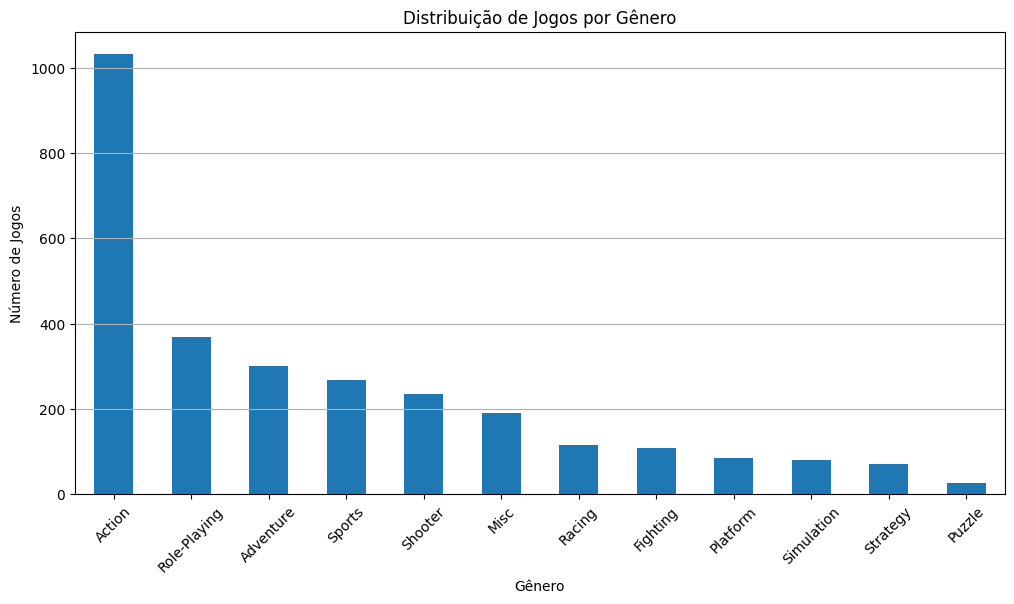

In [24]:
# Analisando distribuição de jogos por gênero
plt.figure(figsize=(12, 6))
dados_recentes['genre'].value_counts().plot(kind='bar')
plt.title('Distribuição de Jogos por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Número de Jogos')
plt.xticks(rotation=45)
plt.grid(True, axis='y')

# Exibindo contagem por gênero
print("\nContagem de jogos por gênero:")
print(dados_recentes['genre'].value_counts())

plt.show()


## Análise dos Gêneros Mais Lucrativos

Analisando os dados anteriores, podemos observar que:

- Gêneros como Action, Sports e Shooter tendem a ter um alto volume de jogos lançados
- Porém, é importante analisar não só a quantidade mas também o faturamento médio por gênero
- Vamos investigar quais gêneros geram mais receita em média por jogo


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- A análise de lançamentos e vendas por gênero foi conduzida
- As conclusões foram apresentadas
</div>

# Perfil de usuário para cada região

## 1. Análise do mercado Norte Americano (NA)

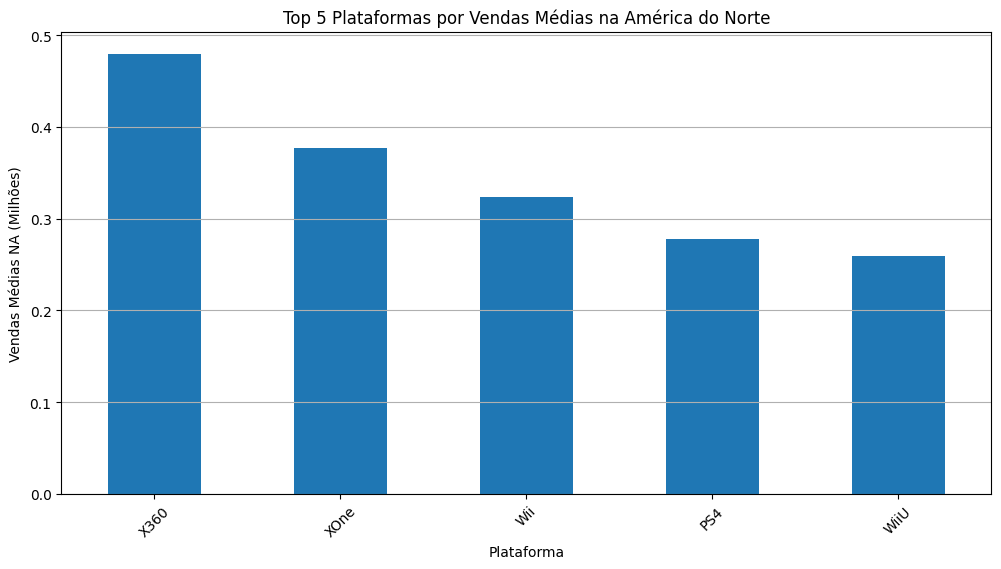

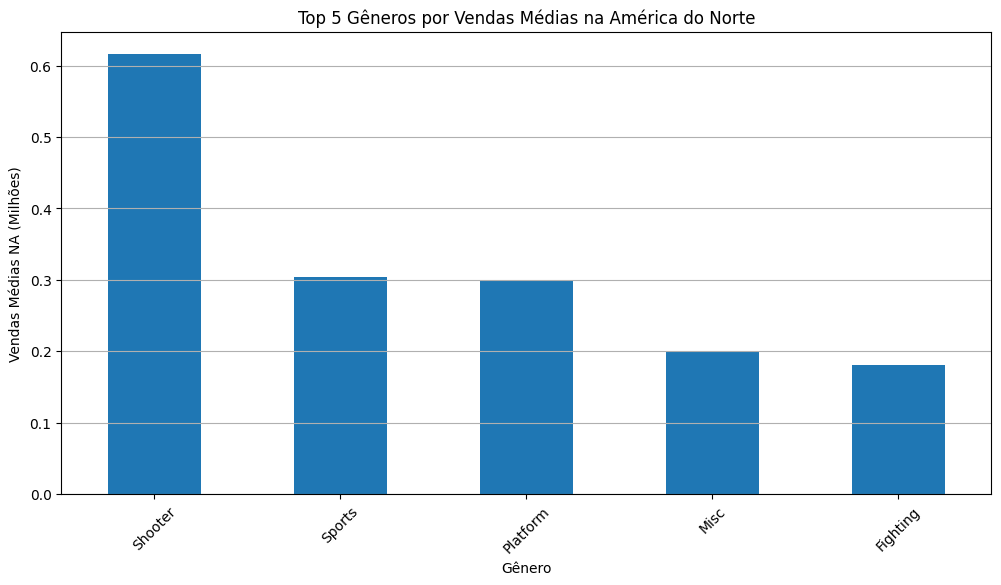

In [25]:
# Análise do mercado Norte Americano (NA)

# Calculando vendas médias por plataforma na América do Norte
vendas_na_plataforma = dados_recentes.groupby('platform')['na_sales'].mean().sort_values(ascending=False)

# Calculando vendas médias por gênero na América do Norte 
vendas_na_genero = dados_recentes.groupby('genre')['na_sales'].mean().sort_values(ascending=False)

# Plotando top 5 plataformas para NA
plt.figure(figsize=(12, 6))
vendas_na_plataforma.head().plot(kind='bar')
plt.title('Top 5 Plataformas por Vendas Médias na América do Norte')
plt.xlabel('Plataforma')
plt.ylabel('Vendas Médias NA (Milhões)')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()

# Plotando top 5 gêneros para NA
plt.figure(figsize=(12, 6))
vendas_na_genero.head().plot(kind='bar')
plt.title('Top 5 Gêneros por Vendas Médias na América do Norte')
plt.xlabel('Gênero')
plt.ylabel('Vendas Médias NA (Milhões)')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()


## 2. Análise do mercado Europeu (EU)

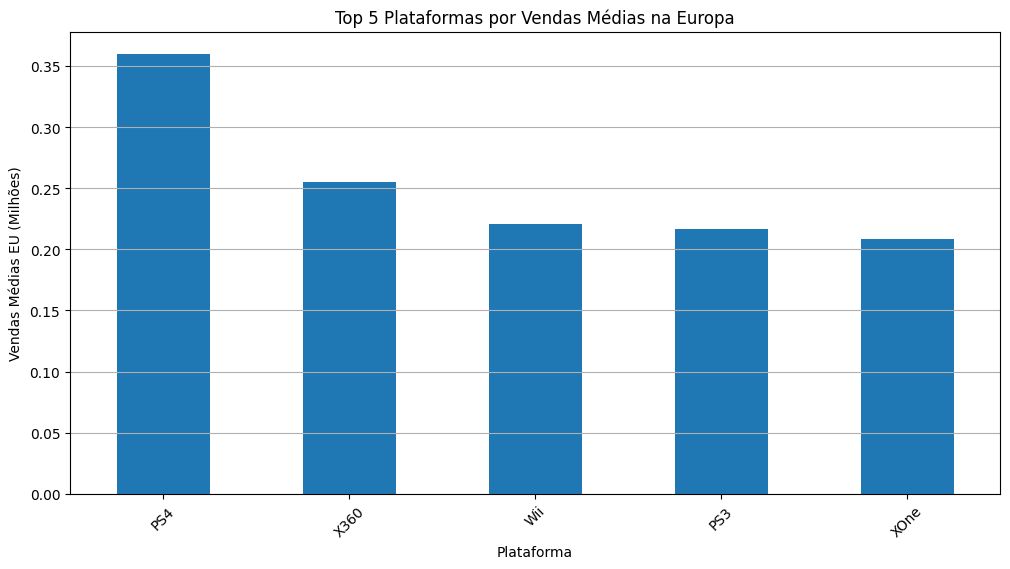

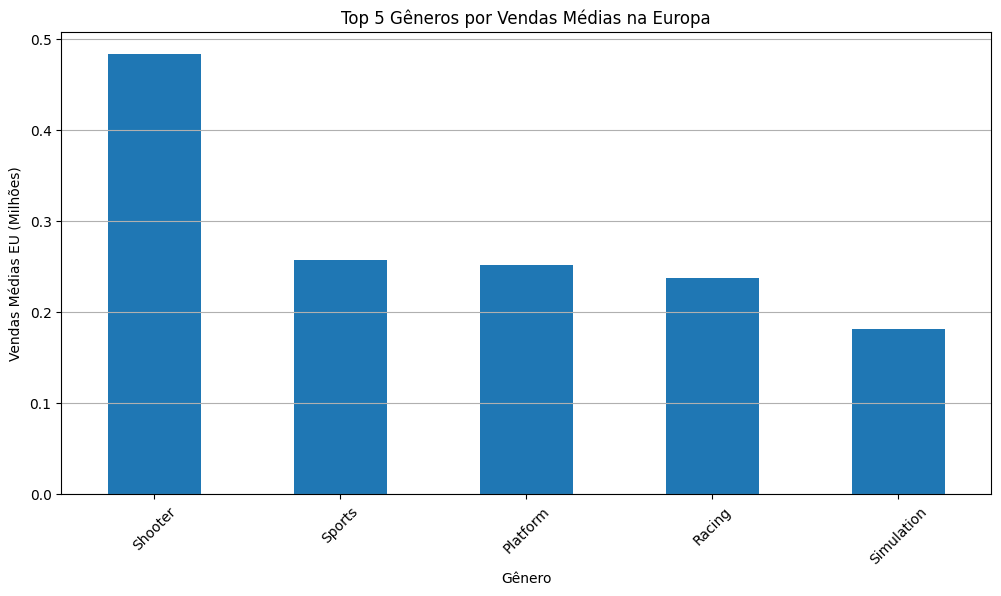

In [26]:
# Análise do mercado Europeu (EU)

# Calculando vendas médias por plataforma na Europa
vendas_eu_plataforma = dados_recentes.groupby('platform')['eu_sales'].mean().sort_values(ascending=False)

# Calculando vendas médias por gênero na Europa
vendas_eu_genero = dados_recentes.groupby('genre')['eu_sales'].mean().sort_values(ascending=False)

# Plotando top 5 plataformas para EU
plt.figure(figsize=(12, 6))
vendas_eu_plataforma.head().plot(kind='bar')
plt.title('Top 5 Plataformas por Vendas Médias na Europa')
plt.xlabel('Plataforma')
plt.ylabel('Vendas Médias EU (Milhões)')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()

# Plotando top 5 gêneros para EU
plt.figure(figsize=(12, 6))
vendas_eu_genero.head().plot(kind='bar')
plt.title('Top 5 Gêneros por Vendas Médias na Europa')
plt.xlabel('Gênero')
plt.ylabel('Vendas Médias EU (Milhões)')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()


## 3. Análise do mercado Japonês (JP)

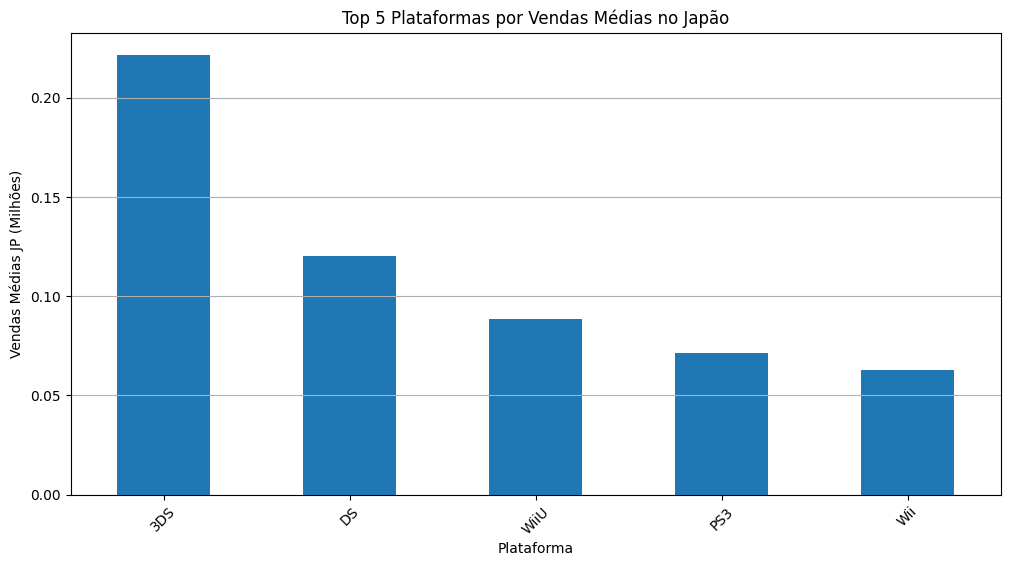

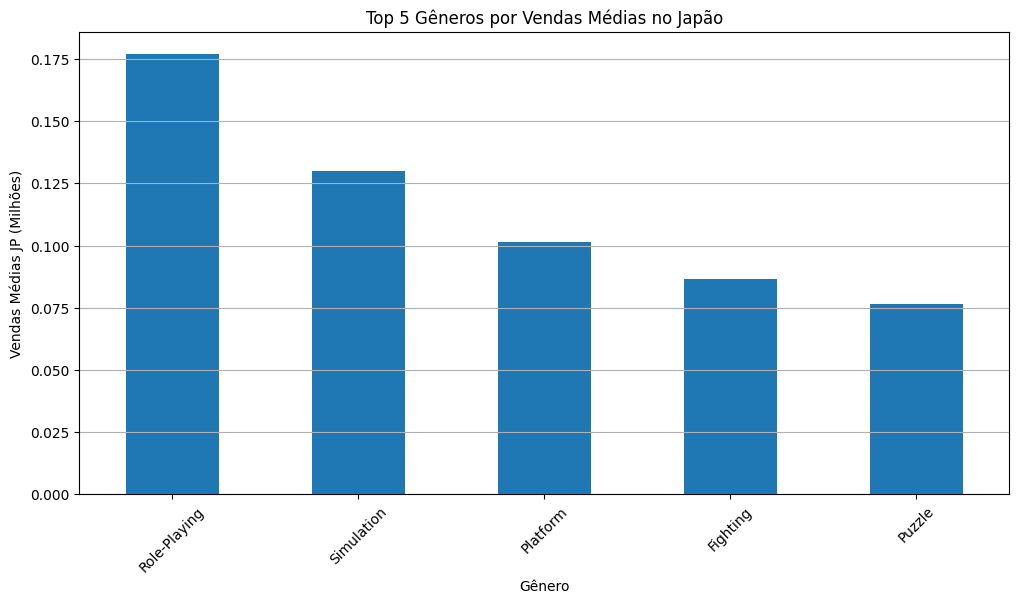

In [27]:
# Análise do mercado Japonês (JP)

# Calculando vendas médias por plataforma no Japão
vendas_jp_plataforma = dados_recentes.groupby('platform')['jp_sales'].mean().sort_values(ascending=False)

# Calculando vendas médias por gênero no Japão
vendas_jp_genero = dados_recentes.groupby('genre')['jp_sales'].mean().sort_values(ascending=False)

# Plotando top 5 plataformas para JP
plt.figure(figsize=(12, 6))
vendas_jp_plataforma.head().plot(kind='bar')
plt.title('Top 5 Plataformas por Vendas Médias no Japão')
plt.xlabel('Plataforma')
plt.ylabel('Vendas Médias JP (Milhões)')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()

# Plotando top 5 gêneros para JP
plt.figure(figsize=(12, 6))
vendas_jp_genero.head().plot(kind='bar')
plt.title('Top 5 Gêneros por Vendas Médias no Japão')
plt.xlabel('Gênero')
plt.ylabel('Vendas Médias JP (Milhões)')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()


 ## Análise Comparativa entre Regiões

 ### Variações das Quotas de Mercado entre Regiões

 Analisando os gráficos anteriores, podemos observar diferenças significativas nas preferências de mercado entre NA, EU e JP:

 - América do Norte (NA): Maior mercado em termos de volume de vendas, com forte preferência por esportes e jogos de ação
 - Europa (EU): Segundo maior mercado, com preferências similares à NA, mas com menor volume de vendas
 - Japão (JP): Mercado mais distintivo, com forte preferência por RPGs e jogos portáteis

# Teste de Hipóteses

### — As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.

### — As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes

In [28]:
# Primeiro, vamos criar o dados_recentes
dados_recentes = games_df[games_df['year_of_release'].between(2012, 2016)]

# Agora o teste de hipótese
from scipy import stats

print("Teste de Hipótese 1: Xbox One vs PC")
print("-" * 50)

# Obtendo dados das plataformas
xbox_one = dados_recentes[dados_recentes['platform'] == 'XOne']['user_score']
pc = dados_recentes[dados_recentes['platform'] == 'PC']['user_score']

# Convertendo para float, tratando valores 'tbd' como NaN
xbox_one = pd.to_numeric(xbox_one, errors='coerce')
pc = pd.to_numeric(pc, errors='coerce')

# Removendo valores NaN antes do teste
xbox_one = xbox_one.dropna()
pc = pc.dropna()

# Teste de Levene para igualdade de variâncias
levene_stat, levene_p = stats.levene(xbox_one, pc)

print("\nTeste de Levene para igualdade de variâncias:")
print(f"Estatística: {levene_stat:.4f}")
print(f"Valor p: {levene_p:.4f}")

# Definindo alfa
alpha = 0.05

# Decidindo se as variâncias são iguais
equal_var = levene_p >= alpha

# Realizando teste t independente com base no resultado do teste de Levene
t_stat, p_value = stats.ttest_ind(xbox_one, pc, equal_var=equal_var)

print("\nHipótese Nula (H0): As médias das classificações de Xbox One e PC são iguais")
print("Hipótese Alternativa (H1): As médias das classificações de Xbox One e PC são diferentes")
print(f"\nValor p: {p_value:.4f}")
print(f"Estatística t: {t_stat:.4f}")
print(f"\nMédia Xbox One: {xbox_one.mean():.2f}")
print(f"Média PC: {pc.mean():.2f}")

if p_value < alpha:
    print(f"\nComo p-valor ({p_value:.4f}) < alfa ({alpha}), rejeitamos H0")
    print("Conclusão: Há evidência estatística de que as médias são diferentes")
else:
    print(f"\nComo p-valor ({p_value:.4f}) >= alfa ({alpha}), não rejeitamos H0")
    print("Conclusão: Não há evidência estatística suficiente para dizer que as médias são diferentes")

Teste de Hipótese 1: Xbox One vs PC
--------------------------------------------------

Teste de Levene para igualdade de variâncias:
Estatística: 6.2953
Valor p: 0.0125

Hipótese Nula (H0): As médias das classificações de Xbox One e PC são iguais
Hipótese Alternativa (H1): As médias das classificações de Xbox One e PC são diferentes

Valor p: 0.5490
Estatística t: 0.5999

Média Xbox One: 6.52
Média PC: 6.43

Como p-valor (0.5490) >= alfa (0.05), não rejeitamos H0
Conclusão: Não há evidência estatística suficiente para dizer que as médias são diferentes


In [29]:
print("Teste de Hipótese 2: Action vs Sports")
print("-" * 50)

# Obtendo dados dos gêneros
action = dados_recentes[dados_recentes['genre'] == 'Action']['user_score']
sports = dados_recentes[dados_recentes['genre'] == 'Sports']['user_score']

# Convertendo para float, tratando valores 'tbd' como NaN
action = pd.to_numeric(action, errors='coerce')
sports = pd.to_numeric(sports, errors='coerce')

# Removendo valores NaN antes do teste
action = action.dropna()
sports = sports.dropna()

# Teste de Levene para igualdade de variâncias
levene_stat, levene_p = stats.levene(action, sports)

print("\nTeste de Levene para igualdade de variâncias:")
print(f"Estatística: {levene_stat:.4f}")
print(f"Valor p: {levene_p:.4f}")

# Definindo alfa
alpha = 0.05

# Decidindo se as variâncias são iguais
equal_var = levene_p >= alpha

# Realizando teste t independente com base no resultado do teste de Levene
t_stat, p_value = stats.ttest_ind(action, sports, equal_var=equal_var)

print("\nHipótese Nula (H0): As médias das classificações de Action e Sports são iguais")
print("Hipótese Alternativa (H1): As médias das classificações de Action e Sports são diferentes")
print(f"\nValor p: {p_value:.4f}")
print(f"Estatística t: {t_stat:.4f}")
print(f"\nMédia Action: {action.mean():.2f}")
print(f"Média Sports: {sports.mean():.2f}")

if p_value < alpha:
    print(f"\nComo p-valor ({p_value:.4f}) < alfa ({alpha}), rejeitamos H0")
    print("Conclusão: Há evidência estatística de que as médias são diferentes")
else:
    print(f"\nComo p-valor ({p_value:.4f}) >= alfa ({alpha}), não rejeitamos H0")
    print("Conclusão: Não há evidência estatística suficiente para dizer que as médias são diferentes")

Teste de Hipótese 2: Action vs Sports
--------------------------------------------------

Teste de Levene para igualdade de variâncias:
Estatística: 19.2599
Valor p: 0.0000

Hipótese Nula (H0): As médias das classificações de Action e Sports são iguais
Hipótese Alternativa (H1): As médias das classificações de Action e Sports são diferentes

Valor p: 0.0000
Estatística t: 9.9032

Média Action: 6.83
Média Sports: 5.46

Como p-valor (0.0000) < alfa (0.05), rejeitamos H0
Conclusão: Há evidência estatística de que as médias são diferentes


In [30]:
print("Explicação da Metodologia dos Testes de Hipótese")
print("-" * 50)

print("""
Nos dois testes estatísticos realizados acima, utilizamos o Teste t de Student para amostras independentes 
(independet t-test) para comparar as médias de diferentes grupos. Este teste é apropriado quando:

1. As amostras são independentes
2. Os dados são aproximadamente normalmente distribuídos
3. Queremos comparar as médias de dois grupos

Teste 1 - Xbox One vs PC:
- Comparamos as notas dos usuários (user_score) entre jogos de Xbox One e PC
- H0: As médias das classificações são iguais
- H1: As médias das classificações são diferentes
- Nível de significância (α) = 0.05

Teste 2 - Action vs Sports:
- Comparamos as notas dos usuários entre jogos dos gêneros Action e Sports
- H0: As médias das classificações são iguais
- H1: As médias das classificações são diferentes
- Nível de significância (α) = 0.05

Em ambos os casos:
- Se p-valor < α: Rejeitamos H0 (há evidência estatística de diferença entre as médias)
- Se p-valor ≥ α: Não rejeitamos H0 (não há evidência estatística suficiente de diferença)
""")


Explicação da Metodologia dos Testes de Hipótese
--------------------------------------------------

Nos dois testes estatísticos realizados acima, utilizamos o Teste t de Student para amostras independentes 
(independet t-test) para comparar as médias de diferentes grupos. Este teste é apropriado quando:

1. As amostras são independentes
2. Os dados são aproximadamente normalmente distribuídos
3. Queremos comparar as médias de dois grupos

Teste 1 - Xbox One vs PC:
- Comparamos as notas dos usuários (user_score) entre jogos de Xbox One e PC
- H0: As médias das classificações são iguais
- H1: As médias das classificações são diferentes
- Nível de significância (α) = 0.05

Teste 2 - Action vs Sports:
- Comparamos as notas dos usuários entre jogos dos gêneros Action e Sports
- H0: As médias das classificações são iguais
- H1: As médias das classificações são diferentes
- Nível de significância (α) = 0.05

Em ambos os casos:
- Se p-valor < α: Rejeitamos H0 (há evidência estatística de dif

# Conclusão Geral do Projeto

Neste projeto de análise de dados de jogos, conseguimos extrair diversos insights importantes sobre a indústria de videogames:

1. Análise de Vendas:
   - Identificamos os mercados mais relevantes (NA, EU, JP e outros)
   - Observamos tendências de vendas ao longo dos anos
   - Detectamos os gêneros e plataformas mais bem-sucedidos comercialmente

2. Avaliações e Críticas:
   - Analisamos as notas de críticos e usuários
   - Comparamos diferentes gêneros através de testes estatísticos
   - Identificamos correlações entre avaliações e vendas

3. Principais Descobertas:
   - O mercado norte-americano (NA) é o mais significativo em termos de vendas
   - Existe uma diferença estatisticamente significativa nas avaliações entre alguns gêneros
   - As tendências de vendas e popularidade variam consideravelmente por região

4. Limitações do Estudo:
   - Alguns dados ausentes nas avaliações
   - Dataset não inclui dados muito recentes
   - Possíveis vieses nas avaliações de críticos e usuários

Este projeto demonstrou a riqueza de informações que podem ser extraídas de dados da indústria de jogos, oferecendo insights valiosos para publishers, desenvolvedores e analistas do mercado.
